<a href="https://colab.research.google.com/github/vibinajames/Machine-Learning-Algorithms/blob/main/ML_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/Bank _new.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df=df.rename(columns={'y':'TD Subscription'})
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,TD Subscription
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [3]:
#check whether there is missing values
df.isna().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
TD Subscription    0
dtype: int64

In [ ]:
# #handling the missing values
# df['age']=df['age'].fillna(df['age'].mode()[0]).astype(int)
# df.isna().sum()

In [4]:
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
TD Subscription     object
dtype: object

In [5]:
numerical=[x for x in df.columns if df[x].dtype!='O']
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [6]:
iqr_data = pd.DataFrame(columns=['Column', 'IQR'])
for column in numerical:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upperlimit=q3+1.5*iqr
    lowerlimit=q1-1.5*iqr
    iqr_data = iqr_data.append({'Column': column, 'IQR': iqr,'Upper Limit':upperlimit,'Lower Limit':lowerlimit}, ignore_index=True)
iqr_data = iqr_data.sort_values('IQR', ascending=False)
print(iqr_data)

           Column      IQR  Upper Limit  Lower Limit
1        duration  217.000     644.5000    -223.5000
9     nr.employed  129.000    5421.6000    4905.6000
0             age   15.000      69.5000       9.5000
7   cons.conf.idx    6.300     -26.9500     -52.1500
8       euribor3m    3.617      10.3865      -4.0815
5    emp.var.rate    3.200       6.2000      -6.6000
2        campaign    2.000       6.0000      -2.0000
6  cons.price.idx    0.919      95.3725      91.6965
3           pdays    0.000     999.0000     999.0000
4        previous    0.000       0.0000       0.0000


In [ ]:
# for column in numerical:
#  for i in df[column]:
#    if i>upperlimit or i<lowerlimit:
#      df[column]=df[column].replace(i,np.mean(df[column])).astype(int)
# df.head(25)

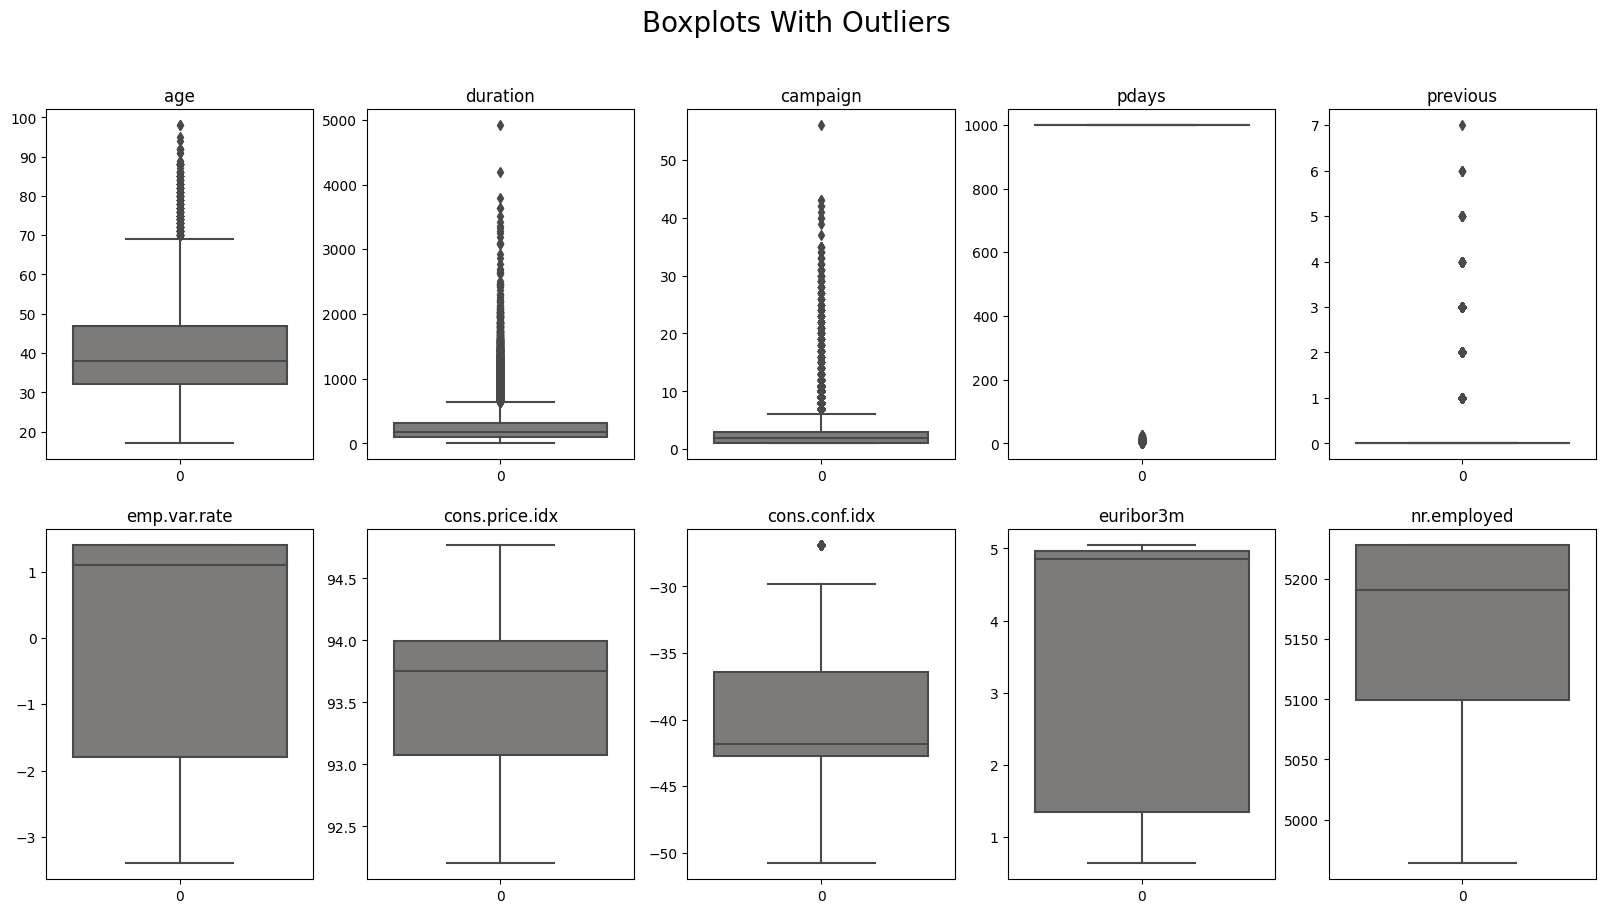

In [7]:
plt.figure(figsize=(20,10))
n=1
for i in numerical:
    plt.subplot(2,5,n)
    sns.boxplot(data=df[i], palette='cividis')
    plt.title(i)
    n=n+1
plt.suptitle('Boxplots With Outliers', size=20)
plt.show()

In [8]:
df.drop(['pdays', 'previous'], axis=1, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,TD Subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
categorical=[x for x in df.columns if df[x].dtype=='O']

In [10]:
for c in categorical:
    print ("{} \n".format(df[c].value_counts()))

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

In [11]:
df.drop(['default'],axis=1,inplace=True)
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,TD Subscription
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


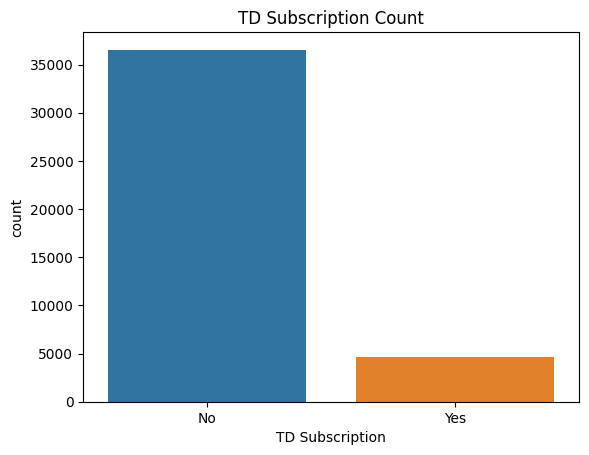

In [12]:
# Create the countplot
sns.countplot(x='TD Subscription', data=df)
plt.title('TD Subscription Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Adjust the labels if needed
plt.show()


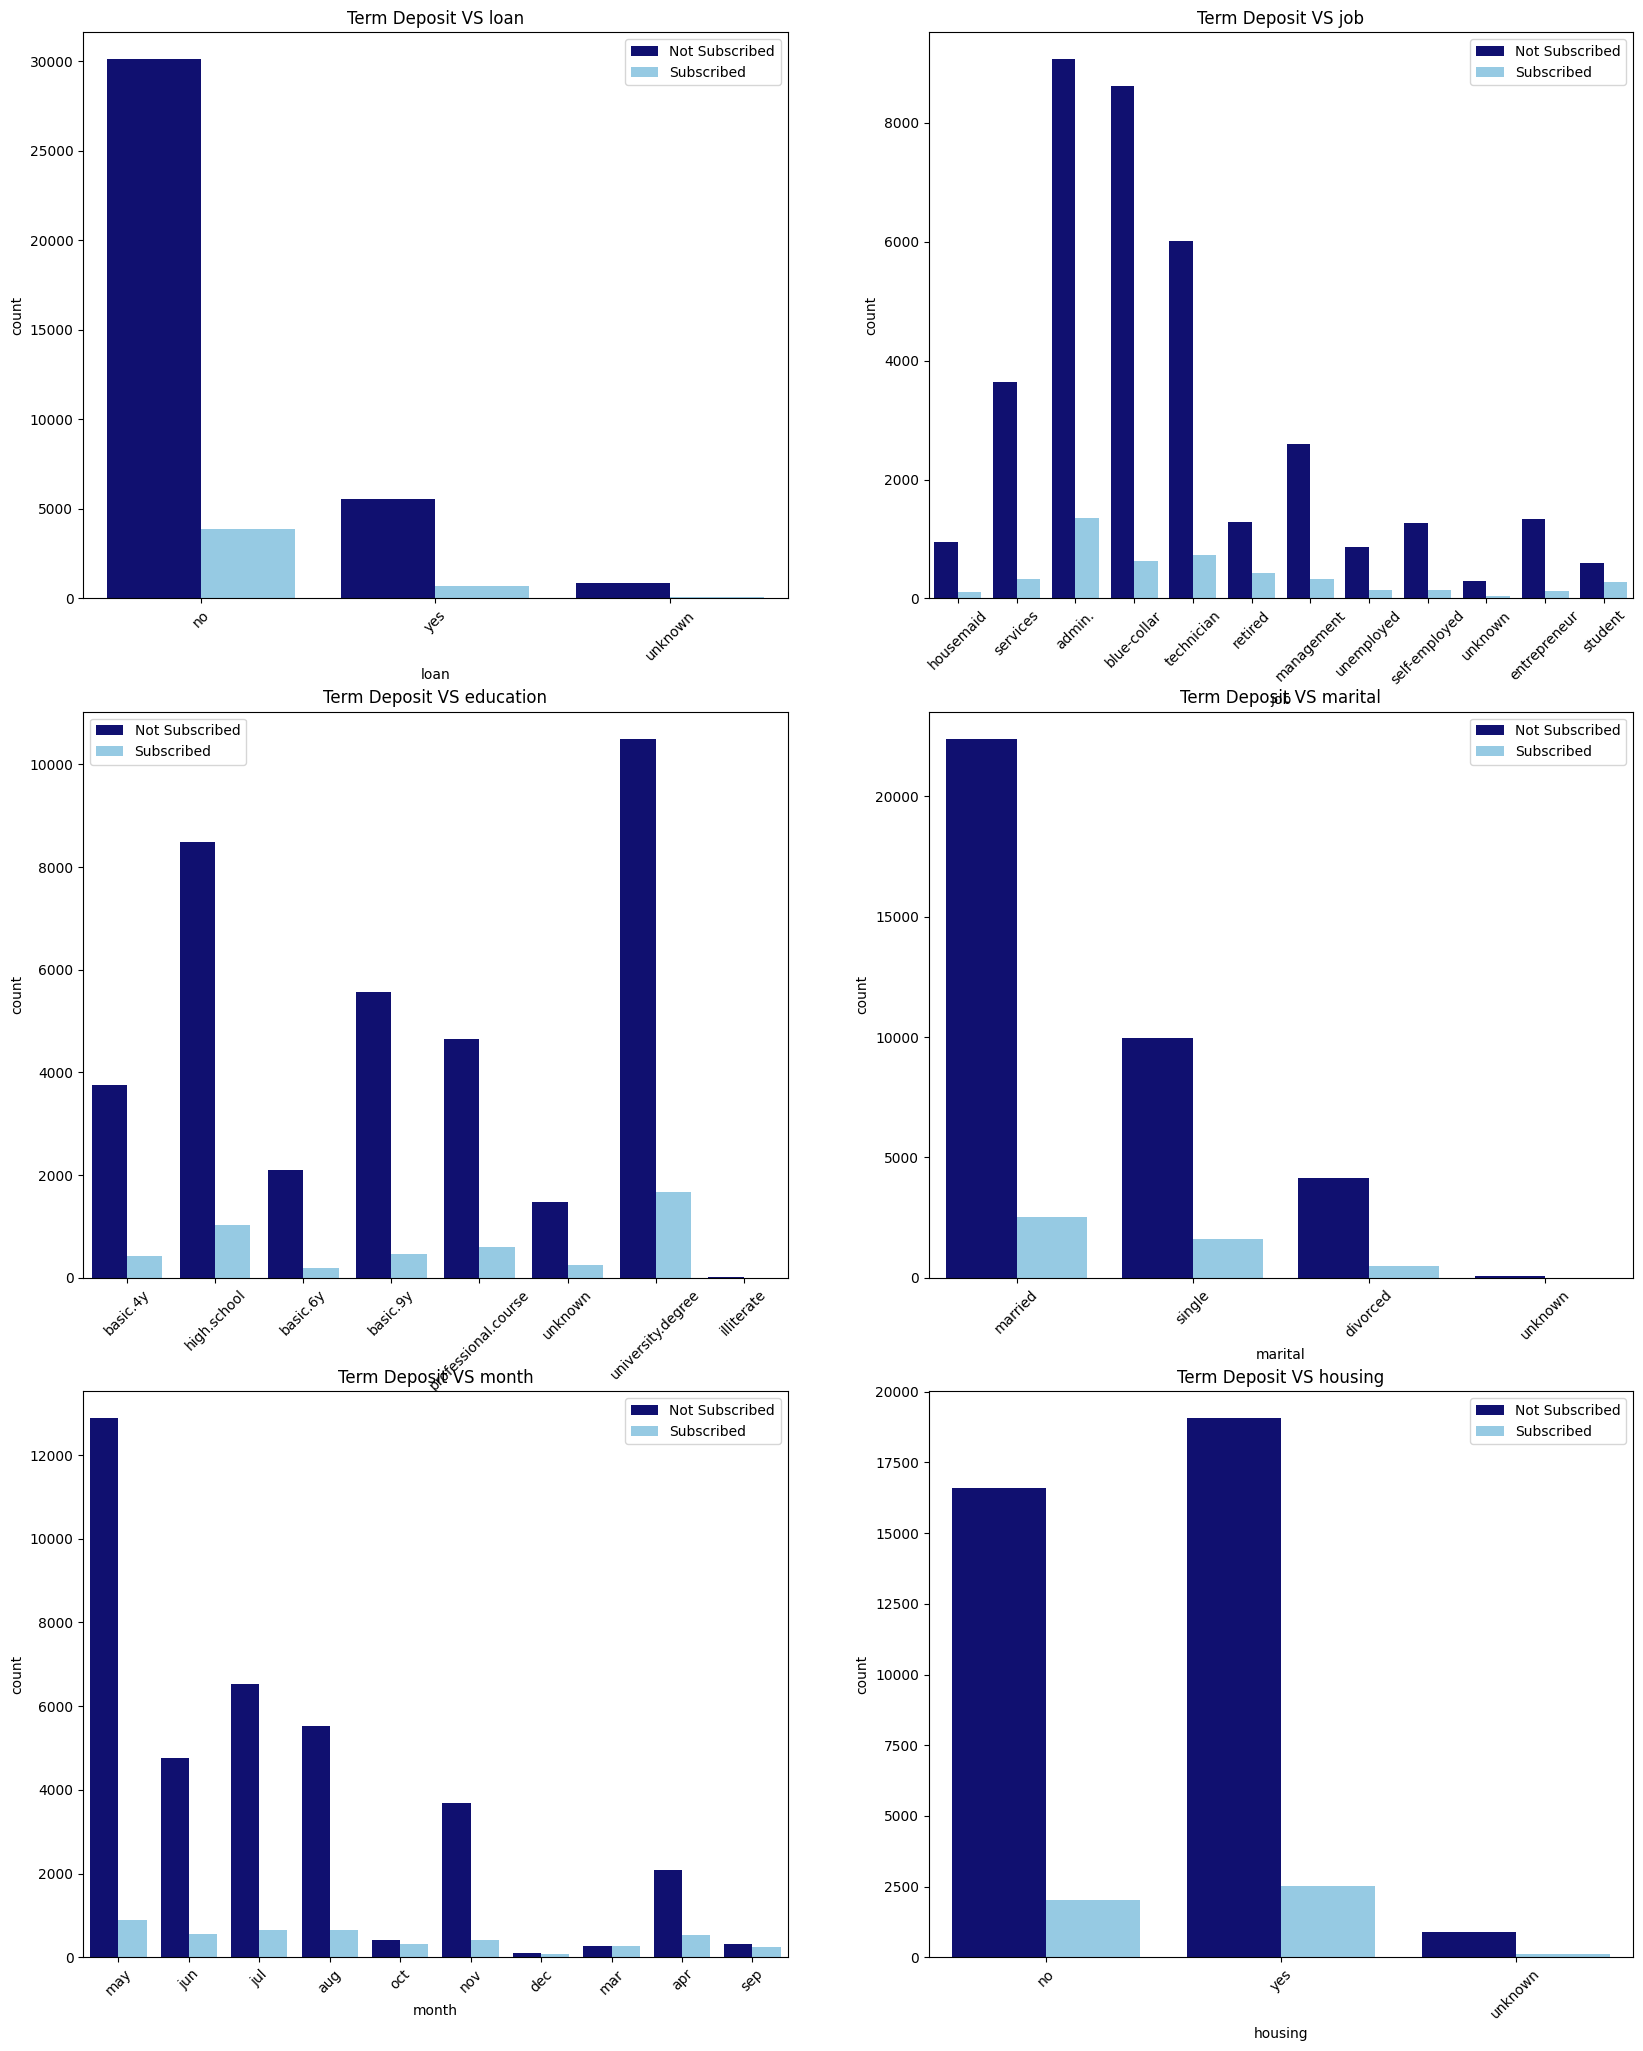

In [13]:
fig,axs = plt.subplots(3,2,figsize=(20,25))
cols=['loan','job','education','marital','month','housing']
colors = ['#000080', '#89CFF0']
c=0
for i in range(3):
  for j in range(2):
    sns.countplot(data=df,x=cols[c],hue='TD Subscription',ax=axs[i][j],palette=colors)
    axs[i][j].set_title('Term Deposit VS {}'.format(cols[c]))
    axs[i][j].legend(['Not Subscribed',"Subscribed"])
    axs[i][j].tick_params(axis='x', rotation=45)
    c+=1

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#we can also use get dummies
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['day_of_week']=le.fit_transform(df['day_of_week'])
df['poutcome']=le.fit_transform(df['poutcome'])
df['TD Subscription']=le.fit_transform(df['TD Subscription'])
df.head(20)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,TD Subscription
0,56,3,1,0,0,0,1,6,1,261,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,2,0,1,6,1,226,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,2,1,6,1,307,1,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,0,0,1,6,1,198,1,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,1,6,1,139,1,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,0,0,1,6,1,217,1,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,2,0,1,6,1,380,1,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,2,0,1,6,1,50,1,1,1.1,93.994,-36.4,4.857,5191.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  int64  
 2   marital          41188 non-null  int64  
 3   education        41188 non-null  int64  
 4   housing          41188 non-null  int64  
 5   loan             41188 non-null  int64  
 6   contact          41188 non-null  int64  
 7   month            41188 non-null  int64  
 8   day_of_week      41188 non-null  int64  
 9   duration         41188 non-null  int64  
 10  campaign         41188 non-null  int64  
 11  poutcome         41188 non-null  int64  
 12  emp.var.rate     41188 non-null  float64
 13  cons.price.idx   41188 non-null  float64
 14  cons.conf.idx    41188 non-null  float64
 15  euribor3m        41188 non-null  float64
 16  nr.employed      41188 non-null  float64
 17  TD Subscript

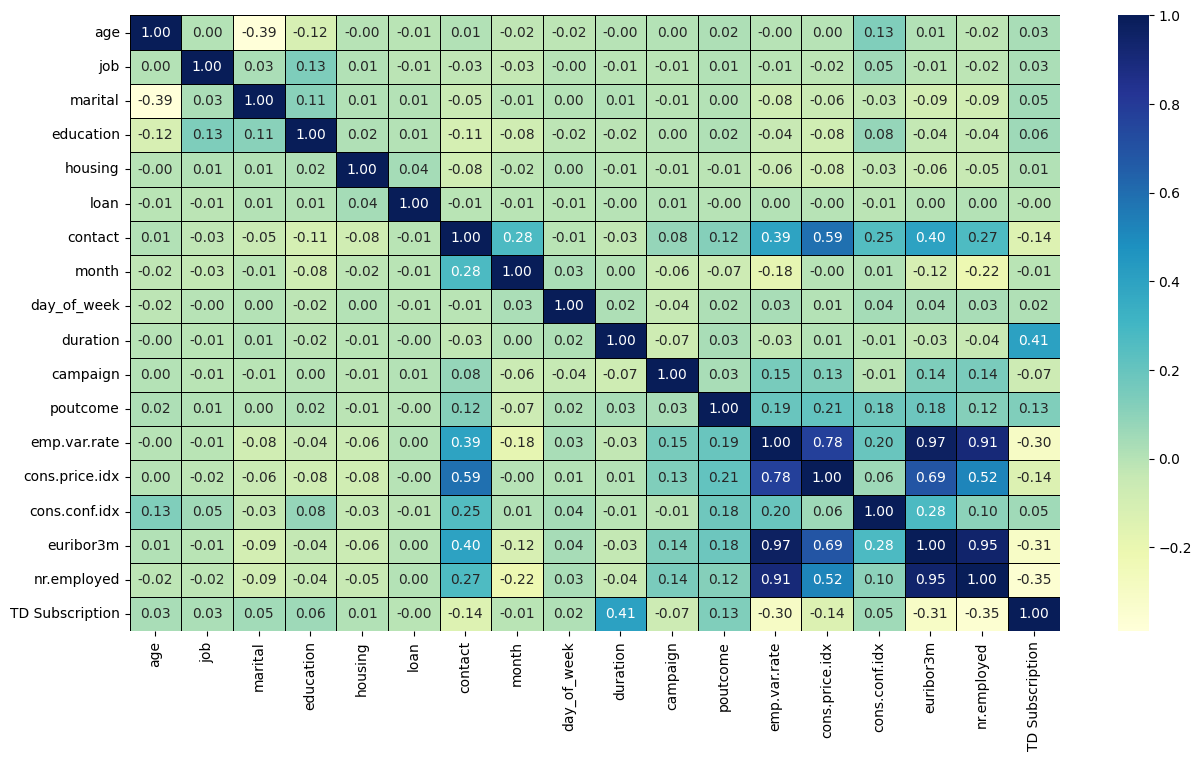

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True,linecolor ='black',fmt=".2f",linewidths=0.5)
plt.show()

In [17]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,1,6,1,261,1,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,1,6,1,149,1,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,2,0,1,6,1,226,1,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,1,6,1,151,1,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,2,1,6,1,307,1,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,2,0,0,7,0,334,1,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,7,0,383,1,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,2,0,0,7,0,189,2,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,7,0,442,1,1,-1.1,94.767,-50.8,1.028,4963.6


**OVERSAMPLING FOR IMBALANCED DATASET**-**SMOTE**

In [18]:
#Using Oversampling for balanced data
from imblearn.over_sampling import SMOTE#Synthetic Minority Oversampling TEchnique
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)
yo.value_counts()

0    36548
1    36548
Name: TD Subscription, dtype: int64

In [19]:
#Model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.20,random_state=1)

In [20]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 2.24919720e+00,  1.87320117e+00,  1.47217828e+00, ...,
        -1.30464207e+00, -8.44898125e-01, -4.19803206e-01],
       [-8.40595661e-04, -1.06672694e+00, -1.77663555e-01, ...,
         7.22069029e-01,  1.00483673e+00,  6.39861836e-01],
       [-8.73805109e-02,  4.03237113e-01, -1.77663555e-01, ...,
        -4.71228162e-01,  1.06082676e+00,  1.06764827e+00],
       ...,
       [-6.93159918e-01,  6.97229924e-01,  1.47217828e+00, ...,
         7.78892705e-01,  1.06098562e+00,  1.06764827e+00],
       [-1.38547924e+00,  1.28521555e+00, -1.77663555e-01, ...,
         1.66913029e+00, -1.11673282e+00, -6.83854669e-01],
       [-3.47000257e-01, -7.72734131e-01, -1.77663555e-01, ...,
         7.22069029e-01,  1.00483673e+00,  6.39861836e-01]])

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7369
           1       0.89      0.95      0.92      7251

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



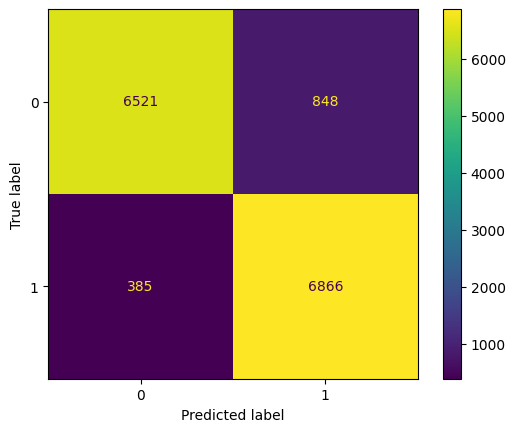

In [22]:
#KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pre_knn=knn.predict(x_test)
print(classification_report(y_test,y_pre_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre_knn))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      7369
           1       0.77      0.83      0.80      7251

    accuracy                           0.80     14620
   macro avg       0.80      0.80      0.80     14620
weighted avg       0.80      0.80      0.80     14620



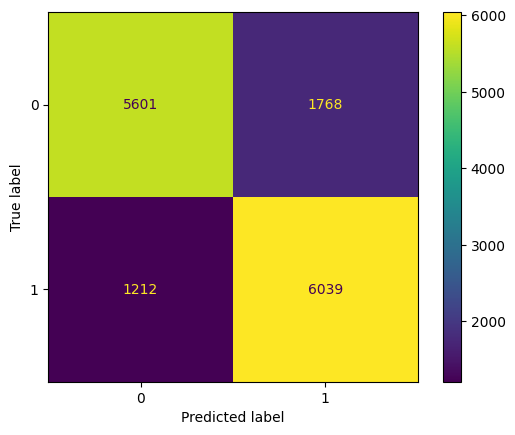

In [23]:
#Naive bayes
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pre_nb=nb.predict(x_test)
print(classification_report(y_test,y_pre_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre_nb))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7369
           1       0.92      0.94      0.93      7251

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



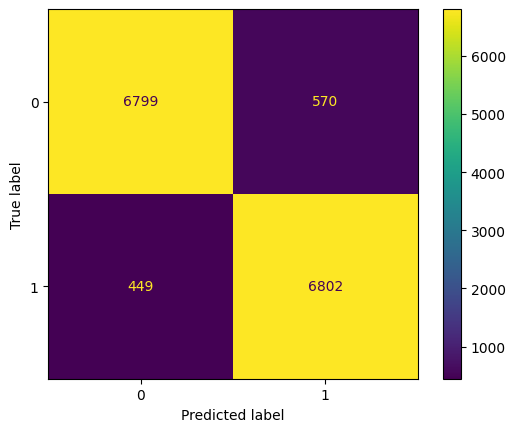

In [24]:
#decision tree
#entropy has same accuracy
dec=DecisionTreeClassifier(criterion='gini')
dec.fit(x_train,y_train)
y_pred_dt=dec.predict(x_test)
print(classification_report(y_test,y_pred_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7369
           1       0.89      0.95      0.92      7251

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



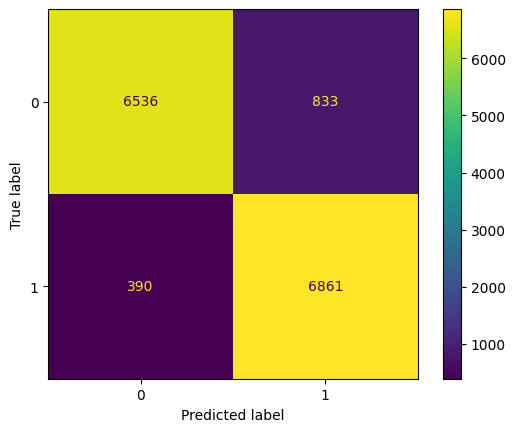

In [25]:
#SVM
sv=SVC()
sv.fit(x_train,y_train)
y_pre_sv=sv.predict(x_test)
print(classification_report(y_test,y_pre_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre_sv))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7369
           1       0.93      0.97      0.95      7251

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



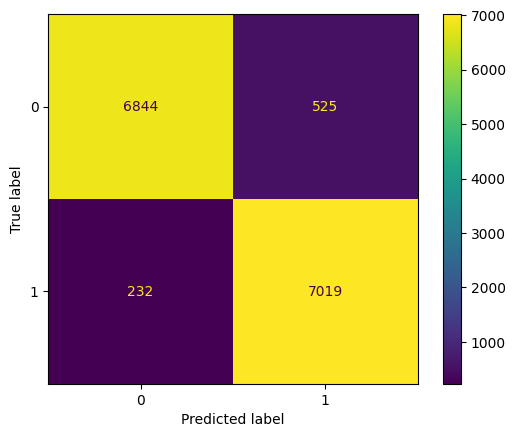

In [26]:
#random forest
rfc=RandomForestClassifier(n_estimators=25,criterion='entropy')
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
print(classification_report(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7369
           1       0.93      0.96      0.95      7251

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



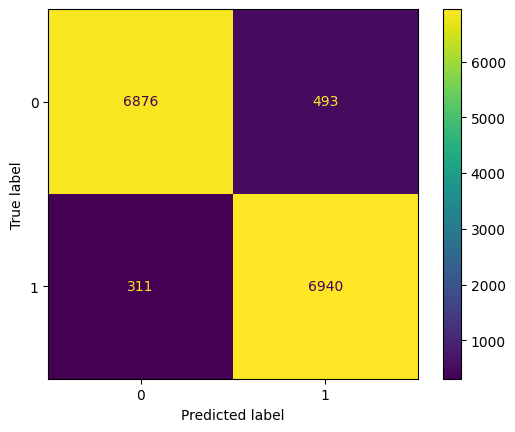

In [27]:
#xgb classifier
xgb=XGBClassifier(n_estimators=80)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print(classification_report(y_test,y_pred_xgb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7369
           1       0.90      0.91      0.90      7251

    accuracy                           0.91     14620
   macro avg       0.91      0.91      0.91     14620
weighted avg       0.91      0.91      0.91     14620



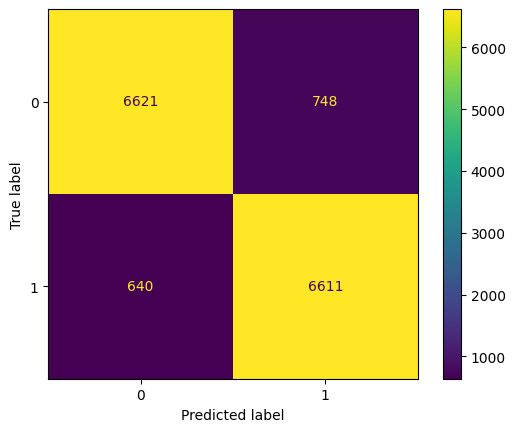

In [28]:
#adaboost classifier
#accuracy increases whwn n_estimators increases where 86,87
abc=AdaBoostClassifier(n_estimators=60)
abc.fit(x_train,y_train)
y_pred_abc=abc.predict(x_test)
print(classification_report(y_test,y_pred_abc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7369
           1       0.86      0.89      0.87      7251

    accuracy                           0.87     14620
   macro avg       0.87      0.87      0.87     14620
weighted avg       0.87      0.87      0.87     14620



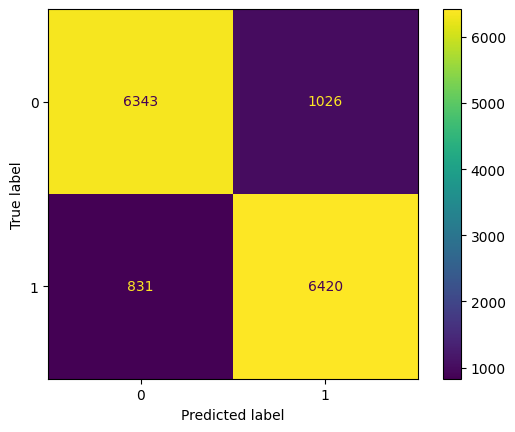

In [29]:
#logistic regression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred_lreg= lreg.predict(x_test)
print(classification_report(y_test,y_pred_lreg))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lreg))

**GRIDSEARCH CV**

In [48]:
#Model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [49]:
#Best score found out using GridSearchCV
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGB Classifier', XGBClassifier()),
    ('AdaBoost Classifier',AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
]
param_grid = {
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {},  # No hyperparameters to tune
    'Decision Tree': {'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [25, 50, 100], 'criterion': ['gini', 'entropy']},
    'XGB Classifier': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]},
    'AdaBoost Classifier': {'n_estimators': [35, 50, 75]},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
}
for name, model in models:
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5)
        grid_search.fit(x_train, y_train)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print("Model:", name)
        print("Best Parameters:", best_params)
        print("Best Score:", best_score)
        print()

Model: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 7}
Best Score: 0.9047647951441578

Model: Naive Bayes
Best Parameters: {}
Best Score: 0.8148710166919575

Model: Decision Tree
Best Parameters: {'criterion': 'entropy'}
Best Score: 0.8918968133535661

Model: Random Forest
Best Parameters: {'criterion': 'entropy', 'n_estimators': 50}
Best Score: 0.914081942336874

Model: XGB Classifier
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best Score: 0.9159939301972685

Model: AdaBoost Classifier
Best Parameters: {'n_estimators': 75}
Best Score: 0.9100758725341427

Model: Logistic Regression
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Score: 0.9105614567526557



**UNDERSAMPLING**

In [31]:
#Using Undersampling
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
xu,yu=under.fit_resample(x,y)
yu.value_counts()

0    4640
1    4640
Name: TD Subscription, dtype: int64

In [32]:
#Model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xu,yu,test_size=0.20,random_state=1)
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [33]:
# Define the classification models
print("UNDER SAMPLING")
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine',SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('XGB Classifier', XGBClassifier()),
    ('AdaBoost Classifier',AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Calculate evaluation metrics
    print("Model:",model)
    print(classification_report(y_test,y_pred))

UNDER SAMPLING
Model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       923
           1       0.84      0.81      0.83       933

    accuracy                           0.83      1856
   macro avg       0.83      0.83      0.83      1856
weighted avg       0.83      0.83      0.83      1856

Model: GaussianNB()
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       923
           1       0.75      0.81      0.78       933

    accuracy                           0.77      1856
   macro avg       0.77      0.77      0.77      1856
weighted avg       0.77      0.77      0.77      1856

Model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       923
           1       0.84      0.83      0.84       933

    accuracy                           0.84      1856
   macro avg       0.84      0.

**FEATURE SELECTION**

In [34]:
#Feature Selection
#chi2 can't be used due to negative values
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
test=SelectKBest(score_func=mutual_info_classif)
fi=test.fit(x,y)
fi.scores_

array([0.01328222, 0.00803293, 0.00529765, 0.00484964, 0.00408601,
       0.00096789, 0.01504248, 0.02675021, 0.00509656, 0.07658507,
       0.00559202, 0.03585319, 0.05416117, 0.06944234, 0.06958406,
       0.07583049, 0.06495442])

In [35]:
col=x.columns
score=pd.DataFrame({'features':col,'scores':fi.scores_})
score.sort_values(by='scores',ascending=False)

,features,scores
9,duration,0.076585
15,euribor3m,0.075830
14,cons.conf.idx,0.069584
13,cons.price.idx,0.069442
16,nr.employed,0.064954
12,emp.var.rate,0.054161
11,poutcome,0.035853
7,month,0.026750
6,contact,0.015042
0,age,0.013282


In [36]:
x_fea=df[['duration','euribor3m','cons.price.idx','cons.conf.idx','nr.employed','month','housing','age','emp.var.rate','poutcome','contact','job']]
x_fea

,duration,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,month,housing,age,emp.var.rate,poutcome,contact,job
0,261,4.857,93.994,-36.4,5191.0,6,0,56,1.1,1,1,3
1,149,4.857,93.994,-36.4,5191.0,6,0,57,1.1,1,1,7
2,226,4.857,93.994,-36.4,5191.0,6,2,37,1.1,1,1,7
3,151,4.857,93.994,-36.4,5191.0,6,0,40,1.1,1,1,0
4,307,4.857,93.994,-36.4,5191.0,6,0,56,1.1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,334,1.028,94.767,-50.8,4963.6,7,2,73,-1.1,1,0,5
41184,383,1.028,94.767,-50.8,4963.6,7,0,46,-1.1,1,0,1
41185,189,1.028,94.767,-50.8,4963.6,7,2,56,-1.1,1,0,5
41186,442,1.028,94.767,-50.8,4963.6,7,0,44,-1.1,1,0,9


In [37]:
#Model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_fea,y,test_size=0.20,random_state=1)

In [38]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [39]:
# Define the classification models
print("FEATURE SELECTION")
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine',SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('XGB Classifier', XGBClassifier()),
    ('AdaBoost Classifier',AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Calculate evaluation metrics
    print("Model:",model)
    print(classification_report(y_test,y_pred))

FEATURE SELECTION
Model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7294
           1       0.59      0.47      0.52       944

    accuracy                           0.90      8238
   macro avg       0.76      0.71      0.73      8238
weighted avg       0.89      0.90      0.90      8238

Model: GaussianNB()
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7294
           1       0.38      0.71      0.50       944

    accuracy                           0.84      8238
   macro avg       0.67      0.78      0.70      8238
weighted avg       0.89      0.84      0.86      8238

Model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7294
           1       0.53      0.54      0.54       944

    accuracy                           0.89      8238
   macro avg       0.74     

**FEATURE EXTRACTION-PCA**

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_pca=pca.fit_transform(x)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [44]:
evr=pca.explained_variance_ratio_
evr

array([0.22638605, 0.08778444, 0.07972421, 0.07252658, 0.06379646,
       0.06079662, 0.05920472, 0.05702071, 0.05566139, 0.05390804])

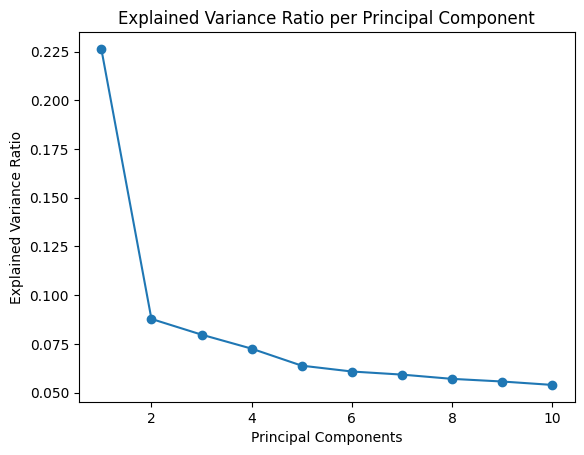

In [45]:
plt.plot(range(1, len(evr) + 1),evr, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

In [46]:
# Define the classification models
print("PCA")
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine',SVC(probability=True)),
    ('Random Forest', RandomForestClassifier()),
    ('XGB Classifier', XGBClassifier()),
    ('AdaBoost Classifier',AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    print("Model:",model)
    print(classification_report(y_test,y_pred))

PCA
Model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7303
           1       0.58      0.39      0.47       935

    accuracy                           0.90      8238
   macro avg       0.75      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238

Model: GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7303
           1       0.58      0.41      0.48       935

    accuracy                           0.90      8238
   macro avg       0.75      0.69      0.71      8238
weighted avg       0.89      0.90      0.89      8238

Model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.47      0.47      0.47       935

    accuracy                           0.88      8238
   macro avg       0.70      0.70      0.7

PCA


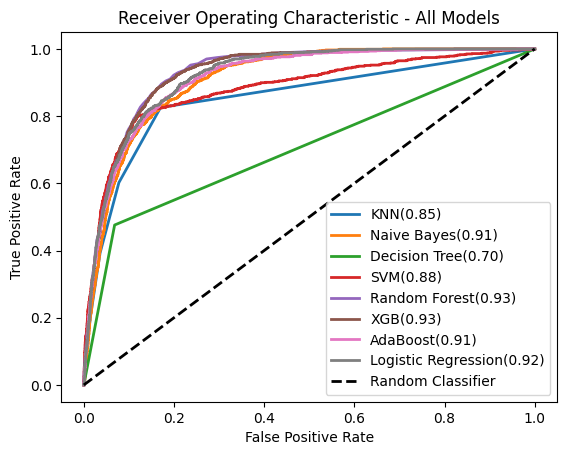

In [47]:
print("PCA")
models = [
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM',SVC(probability=True)),
    ('Random Forest', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('AdaBoost',AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
]
plt.figure()
# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]  #predicted probabilities for positive class

    # Calculate the FPR, TPR, and thresholds for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s(%0.2f)' % (name, roc_auc))
# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - All Models')
plt.legend(loc='lower right')
plt.show()